In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency


In [2]:
data = pd.read_csv("cookie_cats.csv")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [5]:
data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [6]:
data['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [7]:
retentionRates = data.groupby('version').agg({
    'retention_1': 'mean',
    'retention_7': 'mean'
}).reset_index()

In [9]:
retentionRates

,version,retention_1,retention_7
0,gate_30,0.448188,0.190201
1,gate_40,0.442283,0.182000


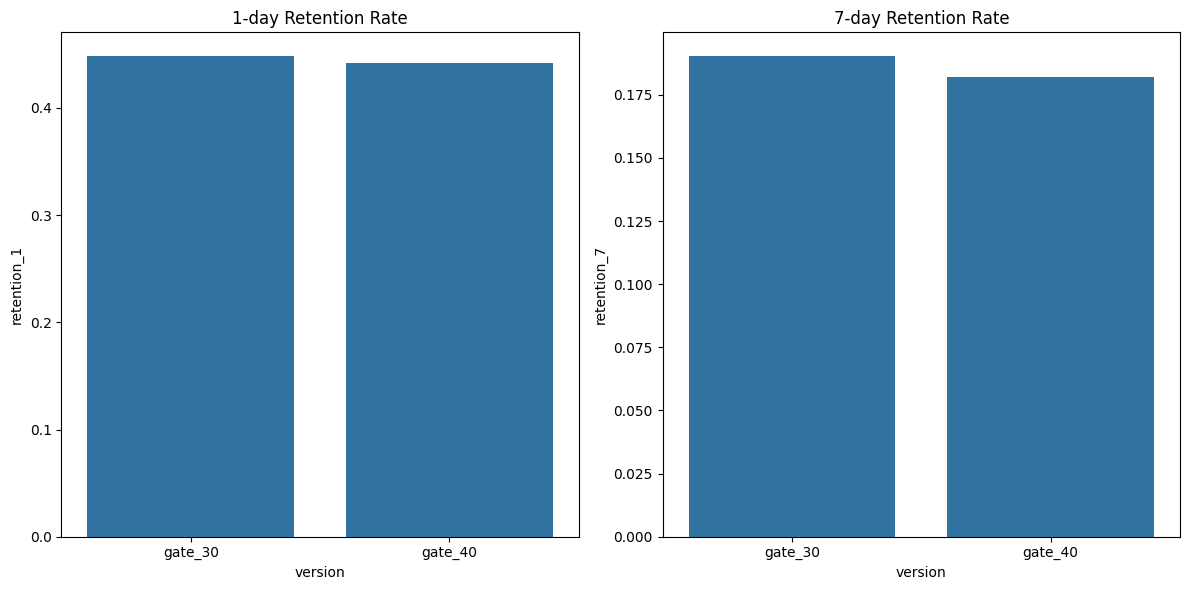

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=retentionRates, x='version', y='retention_1', ax=ax[0])
ax[0].set_title('1-day Retention Rate') 
sns.barplot(data = retentionRates, x='version', y='retention_7', ax=ax[1])
ax[1].set_title('7-day Retention Rate')
plt.tight_layout()
plt.show()

In [13]:
group30 = data[data['version'] == 'gate_30']['retention_1']
group40 = data[data['version'] == 'gate_40']['retention_1']

In [14]:
t_stat = p_value = ttest_ind(group30, group40, equal_var=False)
print(f"1-Day Retention - t-statistic: {t_stat.statistic}, p-value: {t_stat.pvalue}")

1-Day Retention - t-statistic: 1.7840774867039824, p-value: 0.07441443713953834


In [16]:
group_30_7 = data[data['version'] == 'gate_30']['retention_7']
group_40_7 = data[data['version'] == 'gate_40']['retention_7']

In [17]:
t_stat_7 = p_value_7 = ttest_ind(group_30_7, group_40_7, equal_var=False)
print(f"7-Day Retention - t-statistic: {t_stat_7.statistic}, p-value: {t_stat_7.pvalue}")

7-Day Retention - t-statistic: 3.164028946774232, p-value: 0.0015565301810066521


In [18]:
table = pd.crosstab(data['version'], data['retention_1'])

In [20]:
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-square test - Chi2: {chi2}, p-value: {p}")

Chi-square test - Chi2: 3.1591007878782262, p-value: 0.07550476210309086


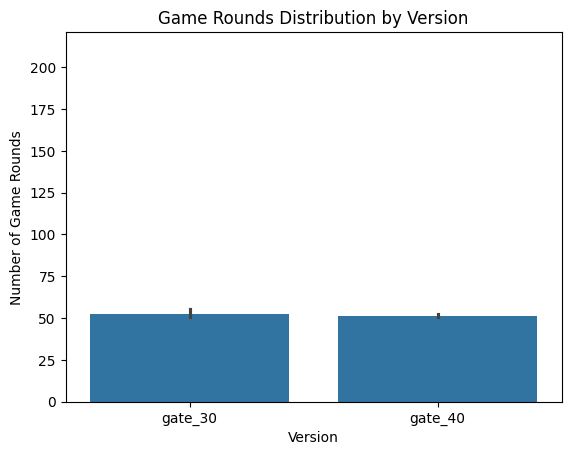

In [21]:
sns.barplot(data=data, x='version', y='sum_gamerounds')
plt.title('Game Rounds Distribution by Version')
plt.ylabel('Number of Game Rounds')
plt.xlabel('Version')
plt.ylim(0, data['sum_gamerounds'].quantile(0.95))
plt.show()